In [1]:
import glob
import subprocess
from tqdm import tqdm
import multiprocessing
from time import sleep
import random

def gulp(input_path):
    sleep(random.random())
    run = True
    output_path = input_path[:-3] + 'out'
    try:
        with open(output_path) as f:
            file = f.read()
        if 'Job Finished at' in file:
            run = False
    except:
        pass
    if run:
        with open(input_path) as f:
            output_path = input_path[:-3] + 'out'
            with open(output_path, 'w') as o:
                try:
                    a = subprocess.run(['gulp'], stdin = f, stdout = o, timeout = None)
                except:
                    pass

all_cases = sorted(glob.glob('*.inp'), key = lambda x: x.split('/')[-1].split('.')[0])

complete = []

for case in all_cases:
    try:
        with open(case[:-3] + 'out', 'r') as f:
            g = f.read()
        if 'Final energy' in g:
            complete.append(case)
    except:
        pass

cases = [case for case in all_cases if case not in complete]

N = len(cases)

def update():
    pbar.update(1)

if __name__ == '__main__':
    with multiprocessing.Pool() as pool:
        for result in tqdm(pool.imap_unordered(gulp, cases), total=len(cases)):
            pass
    pool.close()
    pool.join()

100%|██████████| 1/1 [13:53<00:00, 834.00s/it]


In [2]:
import re
import glob

def getEnergy(path):
    with open(path) as file:
        content = file.readlines()
    for line in content:
        if "Final defect energy" in line:
            return float(re.findall("[-+]?[.]?[\d]+(?:,\d\d\d)*[\.]?\d*(?:[eE][-+]?\d+)?", line)[0])

def getLatticeEnergy(path):
    with open(path) as file:
        content = file.readlines()
    for line in content:
        if "Final energy" in line:
            return float(re.findall("[-+]?[.]?[\d]+(?:,\d\d\d)*[\.]?\d*(?:[eE][-+]?\d+)?", line)[0])

def energyList(data):
    files = glob.glob(data)
    energies = dict()
    for f in files:
        energies[f] = getEnergy(f)
    return energies
        
def latticeEnergy(data):
    lattice_energy = getLatticeEnergy(data)
    return lattice_energy

energies = energyList('*.out')

na2o = latticeEnergy('ana2o.out') #lattice parameter fromm chemtube3d.com (fluorite)
nacl = latticeEnergy('anacl.out') #lattice parameter from worksheet (rocksalt)
mgo = latticeEnergy('amgo.out') #lattice parameter from crystec.de (rocksalt)
mgcl2 = latticeEnergy('amgcl2.out') #lattice parameter from materialsproject.org
cao = latticeEnergy('acao.out') #lattice parameter from ucl.ac.uk (rocksalt)
cacl2 = latticeEnergy('acacl2.out') / 2 #lattice parameter from materialsproject.org
sro = latticeEnergy('asro.out') #lattice parameter from ucl.ac.uk (rocksalt)
srcl2 = latticeEnergy('asrcl2.out') #lattice parameter from materialsproject.org (fluorite)
bao = latticeEnergy('abao.out') #lattice parameter from ucl.ac.uk (rocksalt)
bacl2 = latticeEnergy('abacl2.out') #lattice parameter from materialsproject.org (fluorite)

nn = energies['NN.out'] + nacl
nn2 = energies['2NN.out'] + nacl
nn3 = energies['3NN.out'] + nacl
isolated = energies['na3ocl_na_vac.out'] + energies['na3ocl_cl_vac.out'] + nacl

mg_adjacent = energies['mg_adjacent.out'] + na2o - mgo
mg_opposite1 = energies['mg_opposite1.out'] + na2o - mgo
mg_opposite2 = energies['mg_opposite2.out'] + na2o - mgo
mg_separated = energies['mg_seperated.out'] + na2o - mgo
mg_isolated = energies['na3ocl_na_vac.out'] + energies['na3ocl_mg_dop.out'] + na2o - mgo

ca_adjacent = energies['ca_adjacent.out'] + na2o - cao
ca_opposite1 = energies['ca_opposite1.out'] + na2o - cao
ca_opposite2 = energies['ca_opposite2.out'] + na2o - cao
ca_separated = energies['ca_seperated.out'] + na2o - cao
ca_isolated = energies['na3ocl_na_vac.out'] + energies['na3ocl_ca_dop.out'] + na2o - cao

sr_adjacent = energies['sr_adjacent.out'] + na2o - sro
sr_opposite1 = energies['sr_opposite1.out'] + na2o - sro
sr_opposite2 = energies['sr_opposite2.out'] + na2o - sro
sr_separated = energies['sr_seperated.out'] + na2o - sro
sr_isolated = energies['na3ocl_na_vac.out'] + energies['na3ocl_sr_dop.out'] + na2o - sro

ba_adjacent = energies['ba_adjacent.out'] + na2o - bao
ba_opposite1 = energies['ba_opposite1.out'] + na2o - bao
ba_opposite2 = energies['ba_opposite2.out'] + na2o - bao
ba_separated = energies['ba_seperated.out'] + na2o - bao
ba_isolated = energies['na3ocl_na_vac.out'] + energies['na3ocl_ba_dop.out'] + na2o - bao

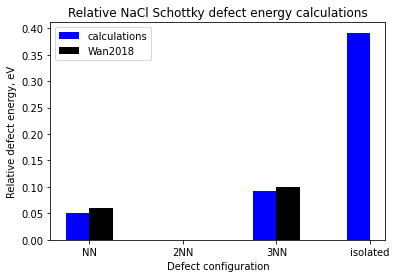

In [11]:
import matplotlib.pyplot as plt
import numpy as np

data = [nn - nn2, 0, nn3 - nn2, isolated - nn2]
wan = [1.24 - 1.18, 0, 1.28 - 1.18]
labels = ['NN', '2NN', '3NN', 'isolated']

plt.bar(np.arange(len(data))-0.1255, data, color='blue', width=0.25)
plt.bar(np.arange(len(wan))+0.125, wan, color='black', width=0.25)
plt.xticks(np.arange(len(labels)), labels)
plt.xlabel('Defect configuration')
plt.ylabel('Relative defect energy, eV')
plt.legend(labels=['calculations', 'Wan2018'], loc = 'upper left')
plt.title('Relative NaCl Schottky defect energy calculations')
plt.savefig('/home/ben/Documents/gulp_calcs/0_summary/nacl_schottky_relative_energies.jpg', bbox_inches='tight', dpi=500)

Text(0.5, 1.0, 'Mg doping energy calculations using new potentials')

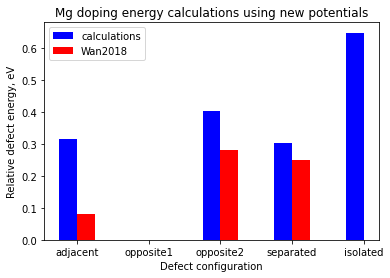

In [6]:
import matplotlib.pyplot as plt
import numpy as np

data = [mg_adjacent - mg_opposite1, 0, mg_opposite2 - mg_opposite1, mg_separated - mg_opposite1, mg_isolated - mg_opposite1]
wan = [2.01 - 1.93, 0, 2.21 - 1.93, 2.18 - 1.93]
labels = ['adjacent', 'opposite1', 'opposite2', 'separated','isolated']

plt.bar(np.arange(len(data))-0.1255, data, color='blue', width=0.25)
plt.bar(np.arange(len(wan))+0.125, wan, color='red', width=0.25)
plt.xticks(np.arange(len(labels)), labels)
plt.xlabel('Defect configuration')
plt.ylabel('Relative defect energy, eV')
plt.legend(labels=['calculations', 'Wan2018'], loc = 'upper left')
plt.title('Mg doping energy calculations using new potentials')

Text(0.5, 1.0, 'Ca doping energy calculations using new potentials')

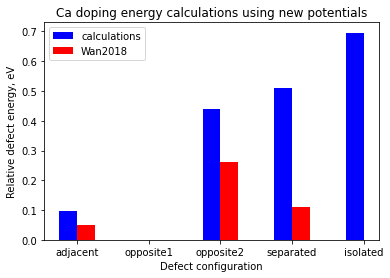

In [7]:
import matplotlib.pyplot as plt
import numpy as np

data = [ca_adjacent - ca_opposite1, 0, ca_opposite2 - ca_opposite1, ca_separated - ca_opposite1, ca_isolated - ca_opposite1]
wan = [1.61 - 1.56, 0, 1.82 - 1.56, 1.67 - 1.56]
labels = ['adjacent', 'opposite1', 'opposite2', 'separated', 'isolated']

plt.bar(np.arange(len(data))-0.1255, data, color='blue', width=0.25)
plt.bar(np.arange(len(wan))+0.125, wan, color='red', width=0.25)
plt.xticks(np.arange(len(labels)), labels)
plt.xlabel('Defect configuration')
plt.ylabel('Relative defect energy, eV')
plt.legend(labels=['calculations', 'Wan2018'], loc = 'upper left')
plt.title('Ca doping energy calculations using new potentials')

Text(0.5, 1.0, 'Sr doping energy calculations using new potentials')

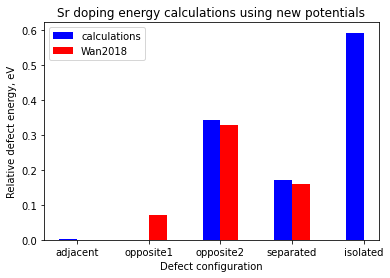

In [11]:
import matplotlib.pyplot as plt
import numpy as np

data =  [sr_adjacent - sr_opposite1, sr_opposite1 - sr_opposite1, sr_opposite2 - sr_opposite1, sr_separated - sr_opposite1, sr_isolated - sr_opposite1]
wan = [0, 1.35 - 1.28, 1.61 - 1.28, 1.44 - 1.28]
labels = ['adjacent', 'opposite1', 'opposite2', 'separated', 'isolated']

plt.bar(np.arange(len(data))-0.1255, data, color='blue', width=0.25)
plt.bar(np.arange(len(wan))+0.125, wan, color='red', width=0.25)
plt.xticks(np.arange(len(labels)), labels)
plt.xlabel('Defect configuration')
plt.ylabel('Relative defect energy, eV')
plt.legend(labels=['calculations', 'Wan2018'], loc = 'upper left')
plt.title('Sr doping energy calculations using new potentials')

Text(0.5, 1.0, 'Ba doping energy calculations using new potentials')

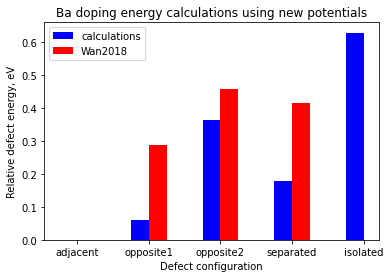

In [12]:
import matplotlib.pyplot as plt
import numpy as np

data =  [0, ba_opposite1 - ba_adjacent, ba_opposite2 - ba_adjacent, ba_separated - ba_adjacent, ba_isolated - ba_adjacent]
wan = [0, 1.06 - 0.773, 1.23 - 0.773, 1.19 - 0.773]
labels = ['adjacent', 'opposite1', 'opposite2', 'separated', 'isolated']

plt.bar(np.arange(len(data))-0.1255, data, color='blue', width=0.25)
plt.bar(np.arange(len(wan))+0.125, wan, color='red', width=0.25)
plt.xticks(np.arange(len(labels)), labels)
plt.xlabel('Defect configuration')
plt.ylabel('Relative defect energy, eV')
plt.legend(labels=['calculations', 'Wan2018'], loc = 'upper left')
plt.title('Ba doping energy calculations using new potentials')

Text(0.5, 1.0, 'Ba doping energy calculations using new potentials')

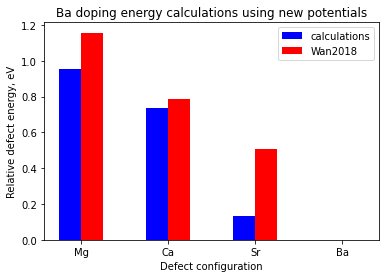

In [13]:
import matplotlib.pyplot as plt
import numpy as np

data =  [mg_opposite1 - ba_adjacent, ca_opposite1 - ba_adjacent, sr_adjacent - ba_adjacent, 0]
wan = [1.93 - 0.773, 1.56 - 0.773, 1.28 - 0.773, 0]
labels = ['Mg', 'Ca', 'Sr', 'Ba']

plt.bar(np.arange(len(data))-0.1255, data, color='blue', width=0.25)
plt.bar(np.arange(len(wan))+0.125, wan, color='red', width=0.25)
plt.xticks(np.arange(len(labels)), labels)
plt.xlabel('Defect configuration')
plt.ylabel('Relative defect energy, eV')
plt.legend(labels=['calculations', 'Wan2018'], loc = 'upper right')
plt.title('Ba doping energy calculations using new potentials')

Text(0.5, 1.0, 'Ba doping energy calculations using new potentials')

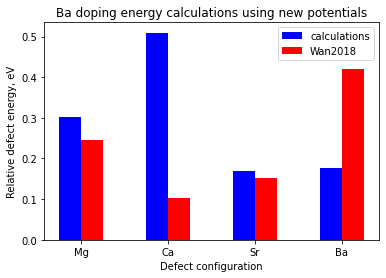

In [14]:
import matplotlib.pyplot as plt
import numpy as np

data =  [mg_separated - mg_opposite1, ca_separated - ca_opposite1, sr_separated - sr_adjacent, ba_separated - ba_adjacent]
wan = [0.246, 0.104, 0.152, 0.419]
labels = ['Mg', 'Ca', 'Sr', 'Ba']

plt.bar(np.arange(len(data))-0.1255, data, color='blue', width=0.25)
plt.bar(np.arange(len(wan))+0.125, wan, color='red', width=0.25)
plt.xticks(np.arange(len(labels)), labels)
plt.xlabel('Defect configuration')
plt.ylabel('Relative defect energy, eV')
plt.legend(labels=['calculations', 'Wan2018'], loc = 'upper right')
plt.title('Ba doping energy calculations using new potentials')

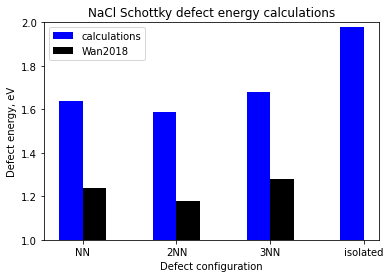

In [12]:
import matplotlib.pyplot as plt
import numpy as np

data = [nn, nn2, nn3, isolated]
wan = [1.24, 1.18, 1.28]
labels = ['NN', '2NN', '3NN', 'isolated']

plt.bar(np.arange(len(data))-0.125, data, color='blue', width=0.25)
plt.bar(np.arange(len(wan))+0.125, wan, color='black', width=0.25)
plt.xticks(np.arange(len(labels)), labels)
plt.xlabel('Defect configuration')
plt.ylabel('Defect energy, eV')
plt.ylim(1.0, 2.0)
plt.legend(labels=['calculations', 'Wan2018'], loc = 'upper left')
plt.title('NaCl Schottky defect energy calculations')
plt.savefig('/home/ben/Documents/gulp_calcs/0_summary/nacl_schottky_energies.jpg', bbox_inches='tight', dpi=500)